In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['figure.figsize'] = (18, 10)
matplotlib.rcParams['font.size'] = 20

In [3]:
import os
import copy
import joblib

from glob import glob
from PIL import Image
from pycocotools import coco
from pprint import pprint

import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [30]:
from skimage.transform import resize

from mscocosol.variable import user_settings
from mscocosol.utils.datagen import DataGen
from mscocosol.utils.general import reverse_transform

# Data Generator sanity check

In [7]:
data_gen_sets = {
    'annotation_file': sets['annotation']['instances_train'],
    'categories': ['banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake'],
    'batch_size': 4,
    'imgs_dir': sets['imgs']['train'],
    'target_img_size': [225, 225],
    'resize_strategy': 'stretch'
}

In [41]:
import yaml

with open(user_settings['sample_sets_file'], 'r') as fp:
    sets = yaml.safe_load(fp)

In [81]:
gen = DataGen(**sets['datagen']['val'])

loading annotations into memory...
Done (t=0.22s)
creating index...
index created!


In [82]:
len(gen._ann_ids_for_imgs)

3036

In [83]:
img, masks = gen[5]

In [84]:
img.shape

torch.Size([3, 192, 192])

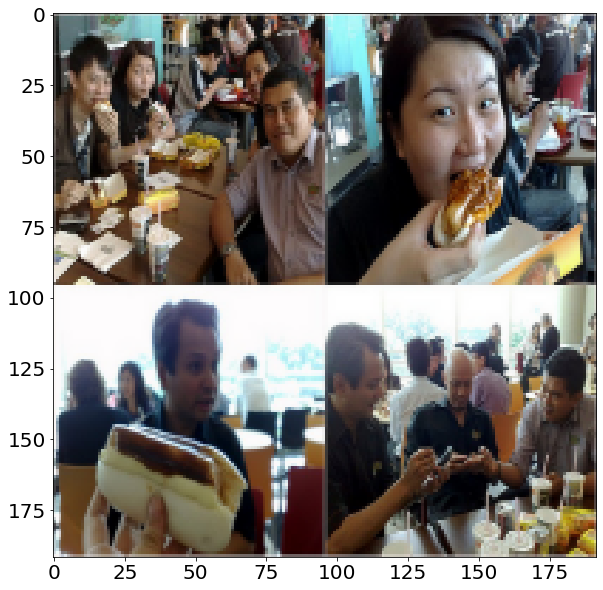

In [85]:
plt.imshow(reverse_transform(img))

plt.show()

torch.Size([3, 192, 192])
(11, 192, 192)


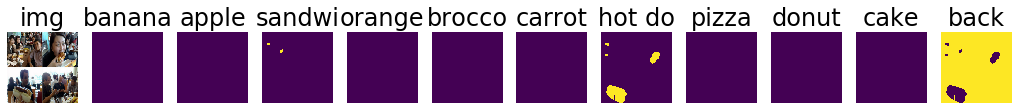

In [89]:
img, masks = gen[5]

print(img.shape)
print(masks.shape)

fig, axes = plt.subplots(1, 11 + gen._add_background)

axes[0].axis('off')
axes[0].imshow(reverse_transform(img))
axes[0].set_title('img')

for j in range(10):
    axes[j + 1].axis('off')
    axes[j + 1].imshow(masks[j, :, :])
    axes[j + 1].set_title(gen._categories[j][:6])

axes[11].axis('off')
axes[11].imshow(masks[10, :, :])
axes[11].set_title('back')
    
plt.show()

In [77]:
gen._tensor.shape

(192, 192, 11)

In [80]:
np.logical_or.reduce(gen._tensor, axis=2).shape

(192, 192)

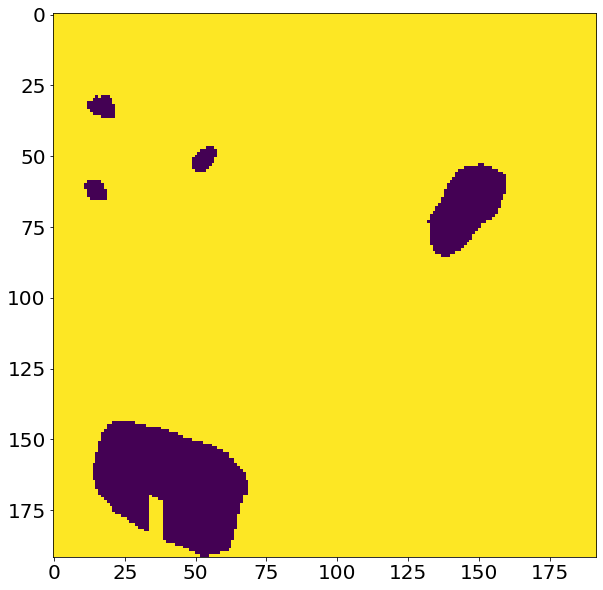

In [75]:
plt.imshow(np.logical_not(np.logical_or.reduce(masks)))